In [21]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

In [23]:
df=pd.read_csv('~/Downloads/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [25]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

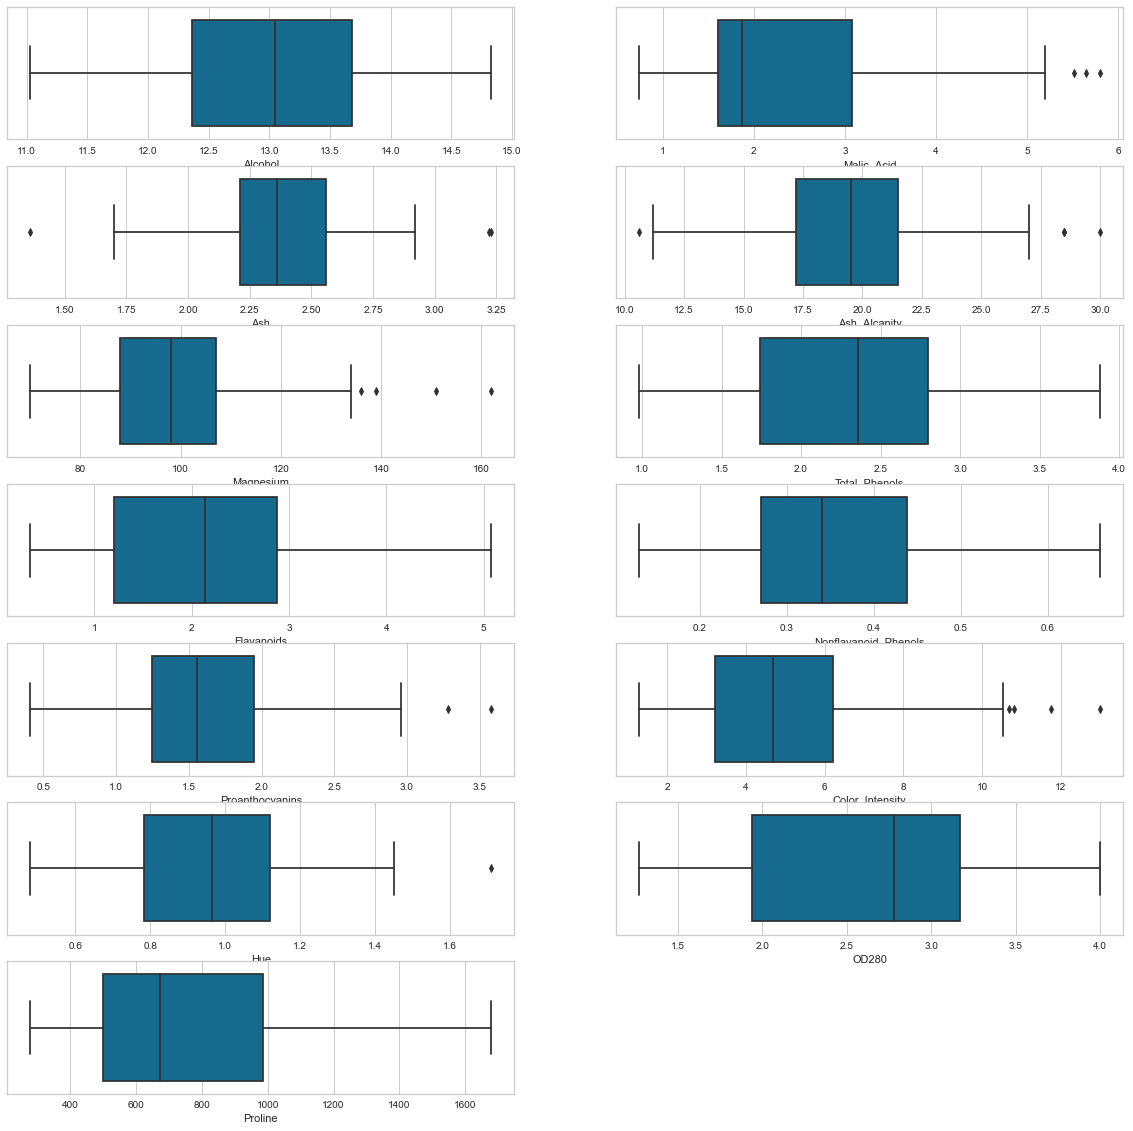

In [26]:
plt.figure(figsize=(20,20))
j=1
for i in df.columns:
    plt.subplot(7,2,j)
    sns.boxplot(df[i])
    j+=1
plt.show()

In [27]:
for i in df.columns:
    q3=np.quantile(df[i],0.75)
    q1=np.quantile(df[i],0.25)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    df.loc[df[i]>ul,i] = ul
    df.loc[df[i]<ll,i] = ll

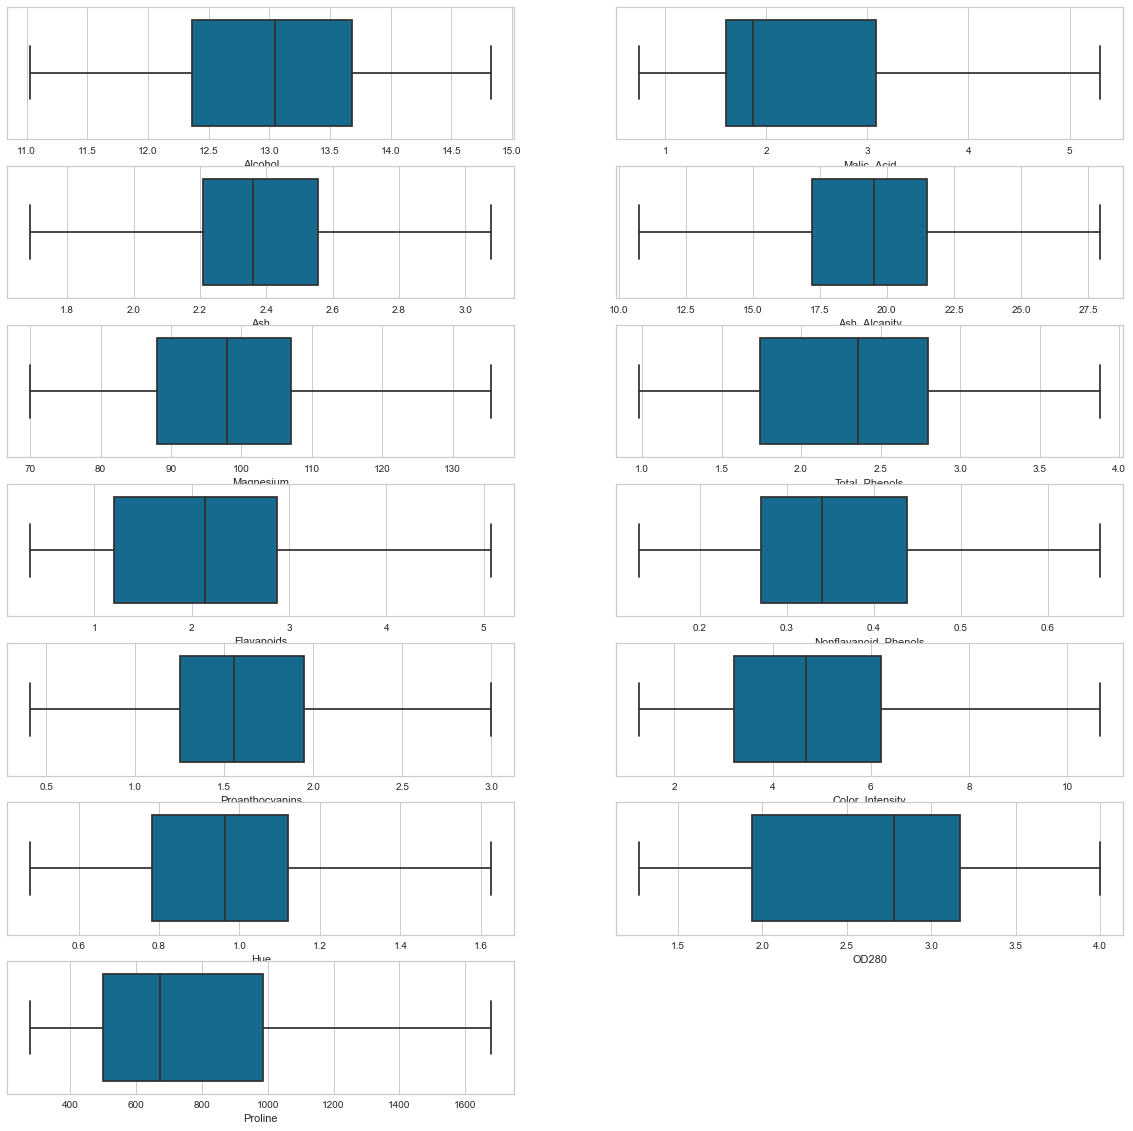

In [28]:
plt.figure(figsize=(20,20))
j=1
for i in df.columns:
    plt.subplot(7,2,j)
    sns.boxplot(df[i])
    j+=1
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()

In [31]:
scaled=ss.fit_transform(df)

In [32]:
scaled=pd.DataFrame(scaled,columns=df.columns)

In [33]:
scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


# Clustering

# k means clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
from sklearn.metrics import silhouette_score

In [38]:
n_clus=[2,3,4,5,6,7,8,9,10]
wcss=[]
sil_scr=[]
for i in n_clus:
    model=KMeans(n_clusters=i)
    pred=model.fit_predict(scaled)
    sil_scr.append(silhouette_score(scaled,pred))
    wcss.append(model.inertia_)

In [39]:
pd.DataFrame({'WCSS':wcss,'Silhouette Score':sil_scr},index=n_clus)

,WCSS,Silhouette Score
2,1654.906081,0.268303
3,1266.070346,0.285463
4,1166.202736,0.241481
5,1101.103526,0.220203
6,1043.553629,0.138609
7,996.445194,0.141817
8,937.093837,0.152281
9,898.678661,0.143584
10,871.746322,0.131810


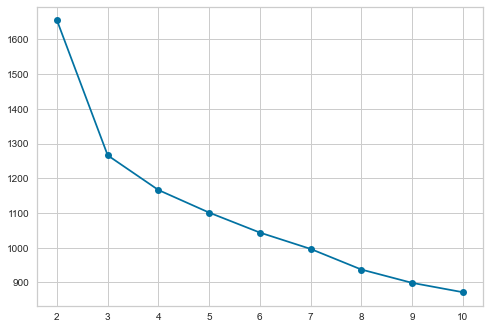

In [42]:
plt.plot(n_clus,wcss,marker='o')
plt.show()

In [43]:
model=KMeans()
kelbow_viz=KElbowVisualizer(model)

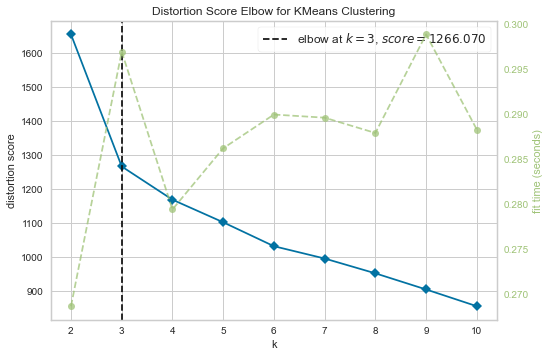

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kelbow_viz.fit(scaled)
kelbow_viz.show()

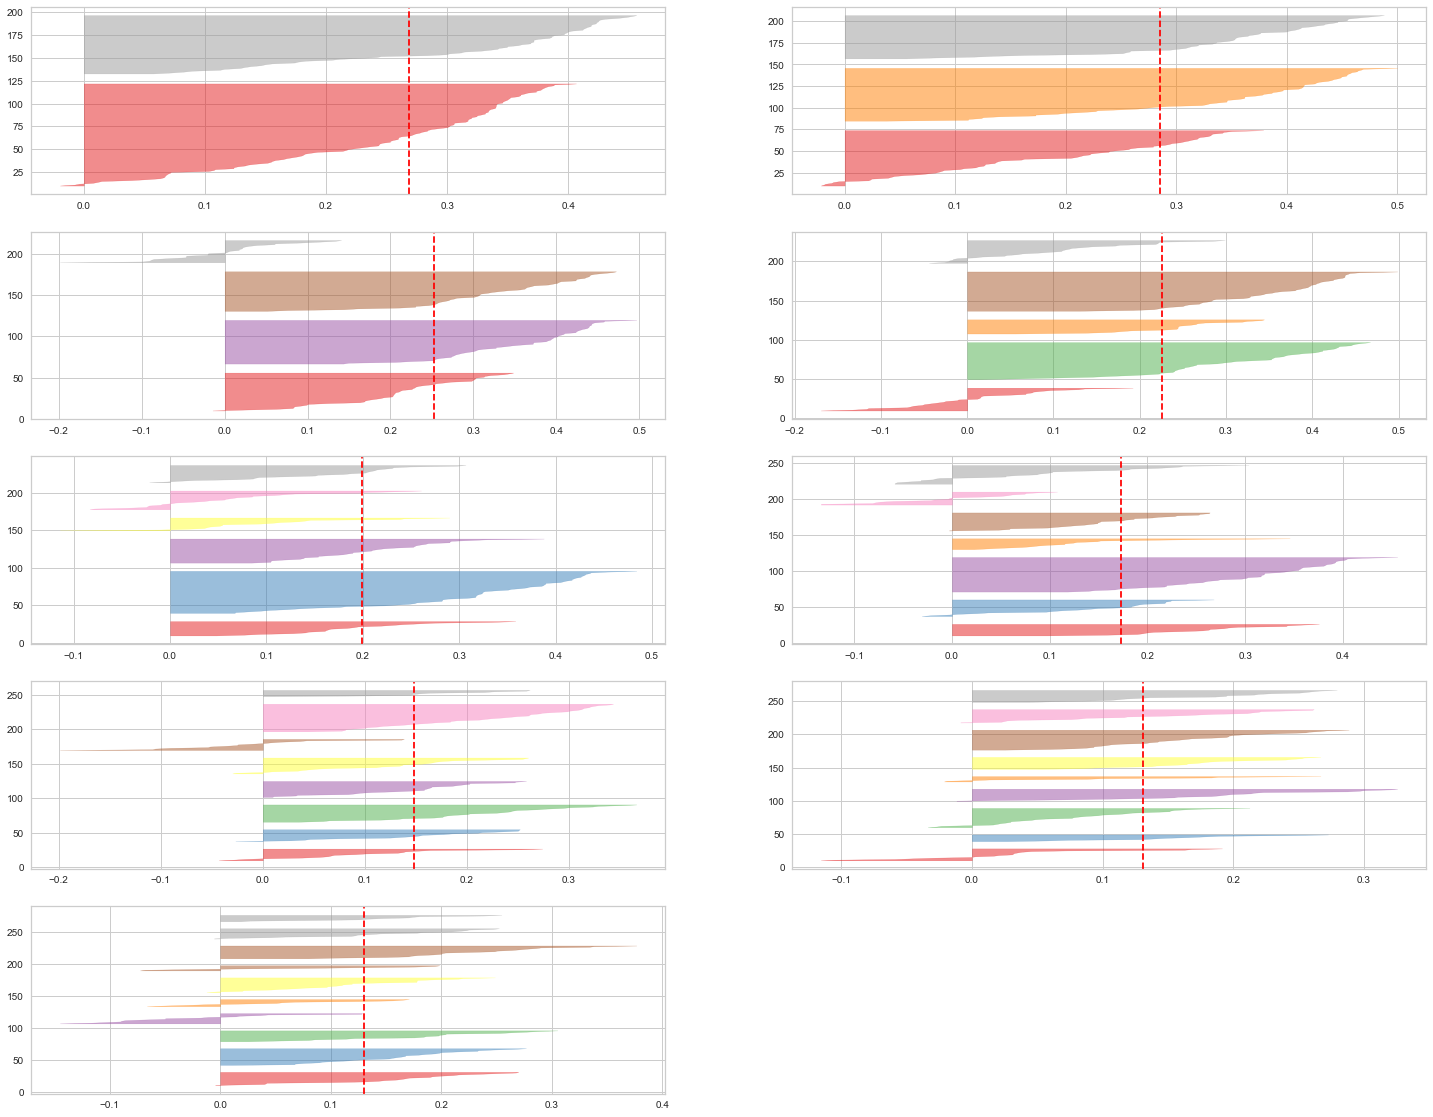

In [47]:
plt.figure(figsize=(25,20))
p=1
for i in n_clus:
    plt.subplot(5,2,p)
    model=KMeans(n_clusters=i, random_state=3)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(scaled)
    p+=1
plt.show()

In [48]:
model_f=KMeans(n_clusters=3,random_state=3)
df['Pred_Km']=model_f.fit_predict(scaled)

In [82]:
df['Pred_Km'].value_counts()

0    65
1    62
2    51
Name: Pred_Km, dtype: int64

In [58]:
clust=model_f.cluster_centers_

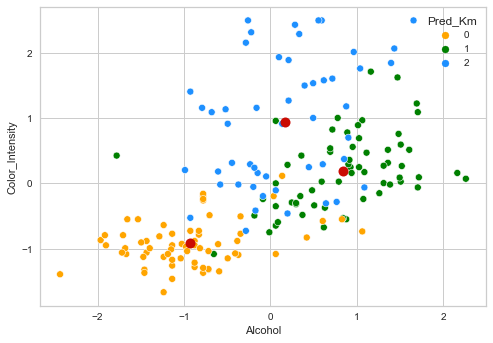

In [98]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',hue=df['Pred_Km'],data=scaled,palette=['orange','green','dodgerblue'])
plt.plot(clust[0][0],clust[0][9],marker='o',color='r',ms=10)
plt.plot(clust[1][0],clust[1][9],marker='o',color='r',ms=10)
plt.plot(clust[2][0],clust[2][9],marker='o',color='r',ms=10)

In [ ]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',hue='Pred_Km',data=scaled[scaled['Pred_Km']==1,palette=['pink']])
plt.plot(clust[0][0],clust[0][9],marker='o',color='r',ms=10)

# Aggloromative clustering

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [74]:
dist_points=linkage(scaled,method='ward')

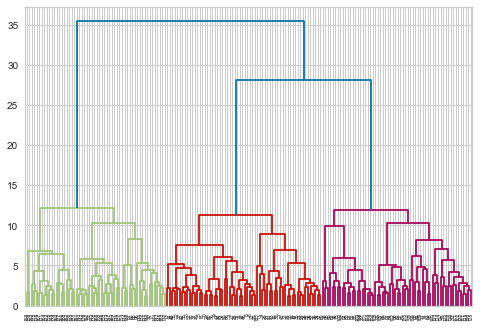

In [75]:
 dend=dendrogram(dist_points)

In [76]:
n_clus

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [78]:
sil_sc=[]
for i in n_clus:
    model=AgglomerativeClustering(n_clusters=i)
    pred=model.fit_predict(scaled)
    sil_sc.append(silhouette_score(scaled,pred))

In [79]:
pd.DataFrame({'Silhouette_score':sil_sc},index=n_clus)

,Silhouette_score
2,0.267601
3,0.278700
4,0.217224
5,0.185433
6,0.123895
7,0.125373
8,0.127837
9,0.136580
10,0.130254


In [80]:
model_f=AgglomerativeClustering(n_clusters=3)
df['Pred_Agglo']=model_f.fit_predict(scaled)

In [81]:
df['Pred_Agglo'].value_counts()

2    62
1    60
0    56
Name: Pred_Agglo, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

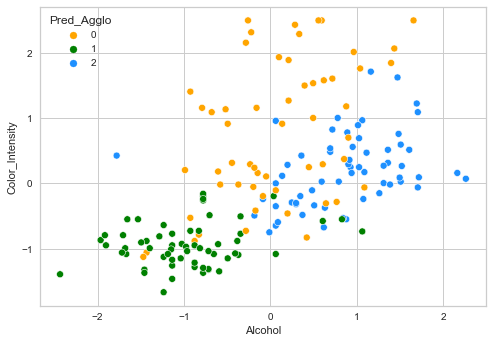

In [97]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',hue=df['Pred_Agglo'],data=scaled,palette=['orange','green','dodgerblue'])


# DBSCAN

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2)
nn_model=nn.fit(scaled)

In [86]:
distance,index=nn_model.kneighbors(scaled)

In [88]:
distance=np.sort(distance,axis=0)

Text(0.5, 0, 'sorted distance')

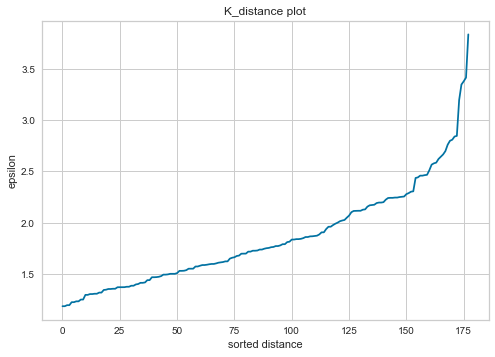

In [89]:
plt.plot(distance[:,1])
plt.title('K_distance plot')
plt.ylabel('epsilon')
plt.xlabel('sorted distance')

In [99]:

sil_score=[]
for i in range(14,27):
    model=DBSCAN(eps=3,min_samples=i)
    pred=model.fit_predict(scaled)
    sil_score.append(silhouette_score(scaled,pred))
pd.DataFrame({'Silhouette_score':sil_score},index=range(14,27))
    

,Silhouette_score
14,0.147153
15,0.147153
16,0.147153
17,0.147153
18,0.142861
19,0.142861
20,0.135104
21,0.133223
22,0.224362
23,0.219169


In [100]:
model_f=DBSCAN(eps=3,min_samples=22)
df['Pred_DBS']=model_f.fit_predict(scaled)
df['Pred_DBS'].value_counts()

 0    114
 1     47
-1     17
Name: Pred_DBS, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Color_Intensity'>

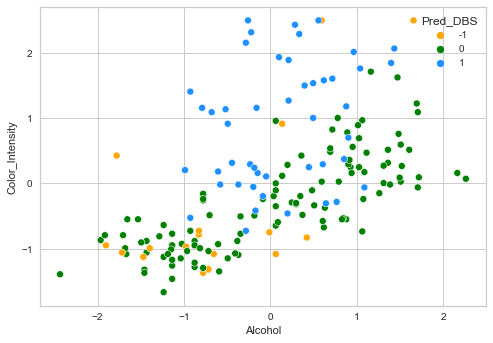

In [101]:
sns.scatterplot(x='Alcohol',y='Color_Intensity',hue=df['Pred_DBS'],data=scaled,palette=['orange','green','dodgerblue'])


# PCA

In [103]:
from sklearn.decomposition import PCA

In [104]:
pca=PCA(n_components=13)

In [105]:
df_pca=pca.fit_transform(scaled)

In [107]:
df_pca=pd.DataFrame(df_pca,columns=range(1,14))
df_pca

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187,0.689257,-1.031209,-0.359055,0.599343,-0.108299,NaN
1,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649,-0.379664,-0.208787,-0.120602,0.372289,0.003640,NaN
2,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401,-1.164755,-0.136538,-0.289991,0.046713,0.042033,NaN
3,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895,0.001904,-0.241293,0.688896,-0.318833,-0.380455,NaN
4,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559,0.283486,0.036566,-0.577236,-0.165368,-0.050547,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-2.173369,-0.383365,0.925038,-0.633273,-1.060998,0.685717,-0.130305,-0.027147,0.235376,0.111934,0.102554,-0.135217,NaN
174,-1.797712,0.210332,0.398412,0.192034,0.011534,0.136131,-0.565178,-0.063488,0.222939,0.236649,-0.309409,-0.181156,NaN
175,-2.865301,-0.975126,0.360633,1.185098,0.354148,0.853504,0.013484,0.020689,0.267263,0.595734,0.646957,-0.025525,NaN
176,-2.393808,-0.561485,-0.643948,0.658651,1.252325,0.813131,0.351025,0.086492,-0.495366,0.353956,0.346681,-0.083471,NaN


In [109]:
var=pca.explained_variance_ratio_
var

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [110]:
add=0
for i in range(13):
    add=add+var[i]
    print('Total variance upto PC%s is %.2f'%(i+1,add))

Total variance upto PC1 is 0.36
Total variance upto PC2 is 0.56
Total variance upto PC3 is 0.67
Total variance upto PC4 is 0.74
Total variance upto PC5 is 0.80
Total variance upto PC6 is 0.85
Total variance upto PC7 is 0.89
Total variance upto PC8 is 0.92
Total variance upto PC9 is 0.94
Total variance upto PC10 is 0.96
Total variance upto PC11 is 0.98
Total variance upto PC12 is 0.99
Total variance upto PC13 is 1.00


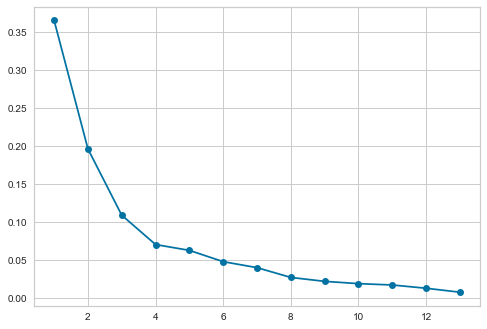

In [112]:
plt.plot(np.arange(1,14),var,marker='o')

# LDA

In [113]:
df_lda=df.drop(columns=['Pred_Agglo','Pred_DBS',])

In [114]:
df_lda.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Pred_Km
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [120]:
lda=LinearDiscriminantAnalysis()

In [121]:
df_lda=lda.fit_transform(df.drop(columns=['Pred_Km']),df['Pred_DBS'])


In [122]:
lda.explained_variance_ratio_

array([0.92084509, 0.07915491])

In [123]:
lda_df=pd.DataFrame({'Dis1':df_lda[:,0],'Dis2':df_lda[:,1],'Label':df['Pred_Km']})

In [124]:
lda_df

,Dis1,Dis2,Label
0,-2.060772,-0.783770,1
1,-2.022273,1.601126,1
2,-2.297985,-0.318107,1
3,-1.132758,-0.596753,1
4,-1.751236,-0.748713,1
...,...,...,...
173,5.033934,1.002206,2
174,4.164452,-0.492104,2
175,5.659782,-0.196242,2
176,4.498192,-1.043600,2
